<a href="https://colab.research.google.com/github/Enriquea017/Valores_atipicos/blob/main/Actividad4.2/Actividad4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('hawaii_limpio.csv')

In [4]:
df.columns

Index(['ID', 'nombre', 'ID_host', 'host_nombre', 'host_desde', 'descripción',
       'tiempo_respuesta', 'tasa_respuesta', 'tasa_aceptación_host',
       'superhost', 'host_vecindario', 'host_listados', 'host_contacto',
       'host_foto_perfil', 'host_identidad_verif', 'vecindario',
       'grupo_vecindario', 'tipo_propiedad', 'tipo_habitación', 'alojados',
       'baños', 'recámaras', 'camas', 'amenidades', 'precio', 'min_noches',
       'max_noches', 'min_min_noches', 'max_max_noches', 'prom_min_noches',
       'prom_max_noches', 'disponibilidad_30', 'disponibilidad_60',
       'disponibilidad_90', 'disponibilidad_365', 'num_reviews',
       'primer_review', 'ly_reviews', 'ocupación_estimada_365',
       'ganancia_estimada_365', 'calificación_general', 'cal_precisión',
       'cal_limpieza', 'cal_check-in', 'cal_comunicación', 'cal_ubicación',
       'cal_valor', 'agendado_instante', 'reviews_mes', 'licencia'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36125 entries, 0 to 36124
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      36125 non-null  int64  
 1   nombre                  36125 non-null  object 
 2   ID_host                 36125 non-null  int64  
 3   host_nombre             36125 non-null  object 
 4   host_desde              36125 non-null  object 
 5   descripción             36125 non-null  object 
 6   tiempo_respuesta        36125 non-null  object 
 7   tasa_respuesta          36125 non-null  object 
 8   tasa_aceptación_host    36125 non-null  object 
 9   superhost               36125 non-null  object 
 10  host_vecindario         36125 non-null  object 
 11  host_listados           36125 non-null  float64
 12  host_contacto           36125 non-null  object 
 13  host_foto_perfil        36125 non-null  object 
 14  host_identidad_verif    36125 non-null

In [48]:
#Definimos variables cualitativas y cuantitativas

cuantitativas_outliers = [
       'alojados',
       'baños', 'recámaras', 'camas', 'precio', 'prom_min_noches',
       'prom_max_noches', 'num_reviews',
       'ly_reviews', 'ocupación_estimada_365',
       'ganancia_estimada_365']

In [24]:
otras_variables = ['ID', 'nombre', 'ID_host', 'host_nombre', 'host_desde', 'descripción',
       'tiempo_respuesta', 'tasa_respuesta', 'tasa_aceptación_host',
       'superhost', 'host_vecindario', 'host_listados', 'host_contacto',
       'host_foto_perfil', 'host_identidad_verif', 'vecindario',
       'grupo_vecindario', 'tipo_propiedad', 'tipo_habitación', 'amenidades', 'min_noches',
       'max_noches', 'min_min_noches', 'max_max_noches', 'disponibilidad_30', 'disponibilidad_60',
       'disponibilidad_90', 'disponibilidad_365',
       'primer_review', 'calificación_general', 'cal_precisión',
       'cal_limpieza', 'cal_check-in', 'cal_comunicación', 'cal_ubicación',
       'cal_valor', 'agendado_instante', 'reviews_mes', 'licencia']

In [20]:
otras_variables = df[otras_variables]
otras_variables

,ID,nombre,ID_host,host_nombre,host_desde,descripción,tiempo_respuesta,tasa_respuesta,tasa_aceptación_host,superhost,host_vecindario,host_listados,host_contacto,host_foto_perfil,host_identidad_verif,vecindario,grupo_vecindario,tipo_propiedad,tipo_habitación,amenidades,min_noches,max_noches,min_min_noches,max_max_noches,disponibilidad_30,disponibilidad_60,disponibilidad_90,disponibilidad_365,primer_review,calificación_general,cal_precisión,cal_limpieza,cal_check-in,cal_comunicación,cal_ubicación,cal_valor,agendado_instante,reviews_mes,licencia
0,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,2009-02-09,"The 'Auwai Suite is a lovely, self-contained a...",within an hour,100%,96%,t,Island of Hawaiʻi,6.0,"['email', 'phone']",t,t,South Kohala,Hawaii,Entire rental unit,Entire home/apt,"[""Coffee maker"", ""Garden view"", ""Outdoor furni...",3,1125,3,1125,8,8,8,8,2011-05-31,4.78,4.88,4.55,4.95,4.85,5.00,4.85,f,0.24,119-269-5808-01R
1,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,2009-02-13,This Wonderful Spacious Studio apt/flat is in ...,within an hour,100%,96%,f,Kailua/Kona,3.0,"['email', 'phone']",t,t,South Kona,Hawaii,Entire rental unit,Entire home/apt,"[""Garden view"", ""Cooking basics"", ""Wifi"", ""Ded...",5,60,5,1125,2,22,48,250,2010-02-16,4.67,4.69,4.42,4.85,4.88,4.74,4.78,t,1.26,TA-163-133-0304-01
2,5480,Isle Of You Naturally Farm Retreat,8145,Normand,2009-02-18,The Best Choice for your Clothing Optional Nud...,Sin respuesta,0%,0%,f,Island of Hawaiʻi,3.0,"['email', 'phone']",t,f,Puna,Hawaii,Private room in cabin,Private room,"[""Kitchen"", ""Host greets you"", ""Breakfast"", ""F...",2,60,2,60,30,60,90,365,2009-02-18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0.00,Sin licencia
3,5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,8279,Sarada,2009-02-20,This split-level condo is right across the str...,Sin respuesta,0%,0%,f,No especificado,3.0,"['email', 'phone', 'work_email']",t,f,North Shore Oahu,Honolulu,Entire home/apt,Entire home/apt,"[""Coffee maker"", ""Freezer"", ""Hair dryer"", ""Bat...",7,730,7,730,0,0,0,0,2009-02-20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0.00,Sin licencia
4,7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,22083,Steven,2009-06-17,We offer a medium term rental requiring a mini...,within a day,100%,0%,f,Island of Hawaiʻi,4.0,"['email', 'phone']",t,t,Puna,Hawaii,Entire home,Entire home/apt,"[""Free washer \u2013 In building"", ""Free carpo...",1,1125,1,1125,30,60,90,269,2010-07-12,4.65,4.65,4.70,4.79,4.76,4.25,4.60,f,0.72,GE-104-390-7584-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36120,1369817596570977772,1212 - 1B2OV The Whaler Resort,529290529,The Whaler,2023-08-01,Stunning one bedroom two bathroom unit overloo...,within an hour,100%,96%,t,No especificado,80.0,"['email', 'phone']",t,t,Lahaina,Maui,Entire rental unit,Entire home/apt,"[""Coffee maker"", ""Heating"", ""Hair dryer"", ""Bat...",1,365,1,120,13,39,62,301,2023-08-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,0.00,"440080020171, TA-102-930-9952-01"
36121,1369824863578661367,MRR: 9BR Luana Garden Villas,39073224,Matthew William,2015-07-20,This incredible 9 bedroom gem combines 3 villa...,within an hour,100%,99%,t,Kaanapali,596.0,"['email', 'phone']",t,t,Lahaina,Maui,Entire condo,Entire home/apt,"[""Clothing storage"", ""Ceiling fan"", ""Cooking b...",2,180,5,180,0,0,7,161,2015-07-20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,0.00,"440140060000, TA-175-718-1952-01"
36122,1369841764486904562,1-br MIL apartment in Wilhelmina,19796174,Marina,2014-08-10,Enjoy a peaceful stay in the heart of Honolulu...,within a few hours,100%,0%,f,Kaimuki,1.0,"['email', 'phone']",t,f,Primary Urban Center,Honolulu,Entire guesthouse,Entire home/apt,"[""Cooking basics"", ""Wifi"", ""Private entrance"",...",29,60,29,60,30,60,90,90,2014-08-10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0.00,Sin licencia
36123,1369865927101822261,Camping Cheap,59552

In [7]:
pd.options.display.max_columns = None

In [8]:
df.head()

,ID,nombre,ID_host,host_nombre,host_desde,descripción,tiempo_respuesta,tasa_respuesta,tasa_aceptación_host,superhost,host_vecindario,host_listados,host_contacto,host_foto_perfil,host_identidad_verif,vecindario,grupo_vecindario,tipo_propiedad,tipo_habitación,alojados,baños,recámaras,camas,amenidades,precio,min_noches,max_noches,min_min_noches,max_max_noches,prom_min_noches,prom_max_noches,disponibilidad_30,disponibilidad_60,disponibilidad_90,disponibilidad_365,num_reviews,primer_review,ly_reviews,ocupación_estimada_365,ganancia_estimada_365,calificación_general,cal_precisión,cal_limpieza,cal_check-in,cal_comunicación,cal_ubicación,cal_valor,agendado_instante,reviews_mes,licencia
0,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,2009-02-09,"The 'Auwai Suite is a lovely, self-contained a...",within an hour,100%,96%,t,Island of Hawaiʻi,6.0,"['email', 'phone']",t,t,South Kohala,Hawaii,Entire rental unit,Entire home/apt,2,1,1,1,"[""Coffee maker"", ""Garden view"", ""Outdoor furni...",128.0,3,1125,3,1125,3.0,1125.0,8,8,8,8,40,2011-05-31,6,36,4608.000000,4.78,4.88,4.55,4.95,4.85,5.00,4.85,f,0.24,119-269-5808-01R
1,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,2009-02-13,This Wonderful Spacious Studio apt/flat is in ...,within an hour,100%,96%,f,Kailua/Kona,3.0,"['email', 'phone']",t,t,South Kona,Hawaii,Entire rental unit,Entire home/apt,2,1,0,2,"[""Garden view"", ""Cooking basics"", ""Wifi"", ""Ded...",97.0,5,60,5,1125,5.0,1125.0,2,22,48,250,231,2010-02-16,14,130,12610.000000,4.67,4.69,4.42,4.85,4.88,4.74,4.78,t,1.26,TA-163-133-0304-01
2,5480,Isle Of You Naturally Farm Retreat,8145,Normand,2009-02-18,The Best Choice for your Clothing Optional Nud...,Sin respuesta,0%,0%,f,Island of Hawaiʻi,3.0,"['email', 'phone']",t,f,Puna,Hawaii,Private room in cabin,Private room,2,1,1,1,"[""Kitchen"", ""Host greets you"", ""Breakfast"", ""F...",117.0,2,60,2,60,2.0,60.0,30,60,90,365,0,2009-02-18,0,0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0.00,Sin licencia
3,5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,8279,Sarada,2009-02-20,This split-level condo is right across the str...,Sin respuesta,0%,0%,f,No especificado,3.0,"['email', 'phone', 'work_email']",t,f,North Shore Oahu,Honolulu,Entire home/apt,Entire home/apt,4,2,2,3,"[""Coffee maker"", ""Freezer"", ""Hair dryer"", ""Bat...",803.5,7,730,7,730,7.0,730.0,0,0,0,0,0,2009-02-20,0,0,4719.909091,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0.00,Sin licencia
4,7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,22083,Steven,2009-06-17,We offer a medium term rental requiring a mini...,within a day,100%,0%,f,Island of Hawaiʻi,4.0,"['email', 'phone']",t,t,Puna,Hawaii,Entire home,Entire home/apt,4,0,1,1,"[""Free washer \u2013 In building"", ""Free carpo...",98.0,1,1125,1,1125,1.0,1125.0,30,60,90,269,128,2010-07-12,0,0,0.000000,4.65,4.65,4.70,4.79,4.76,4.25,4.60,f,0.72,GE-104-390-7584-01


<Figure size 1500x800 with 0 Axes>

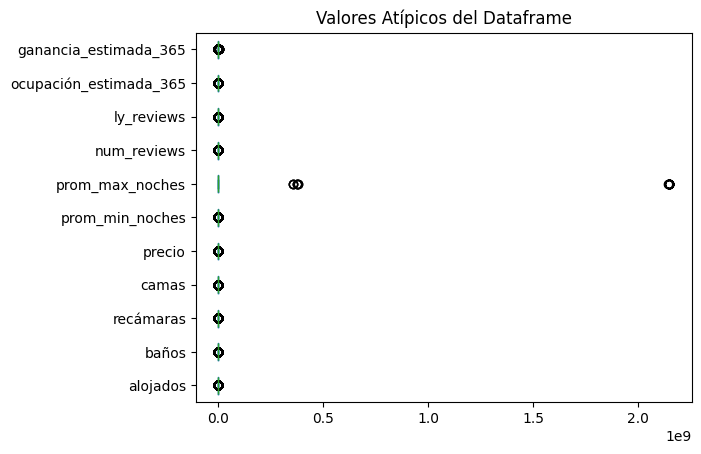

In [49]:
diagrama = plt.figure(figsize =(15, 8))
df[cuantitativas_outliers].plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
#Observarmos que los outliers, además de prom_noches maximas (esta se espera igualmente que tenga valores muy altos),
#la ganancia estimada y el precio cuentan con muchos outliers, pero igualmente no queremos aplicar métodos muy robustos de
#identificación de outliers, justamente porque podría afectar al anáñisis de estas variables relacionadas a valor monetario.

In [23]:
cuantitativas_outliers.shape

(36125, 11)

In [50]:
# Calculate limits and filter for outliers for each column in the list 'cuantitativas_outliers'
df2 = pd.DataFrame() # Initialize an empty DataFrame to store filtered data
for col in cuantitativas_outliers:
    y = df[col]
    Limite_Superior = y.mean() + 3 * y.std()
    Limite_Inferior = y.mean() - 3 * y.std()
    print(f"Column: {col}")
    print("Limite superior permitido:", Limite_Superior)
    print("Limite inferior permitido:", Limite_Inferior)
    print("-" * 30)

    # Filter the DataFrame for the current column based on the calculated limits
    df2[col] = y[(y <= Limite_Superior) & (y >= Limite_Inferior)]

Column: alojados
Limite superior permitido: 11.999901336136311
Limite inferior permitido: -2.452275038558457
------------------------------
Column: baños
Limite superior permitido: 4.044739399795999
Limite inferior permitido: -0.9766701956437491
------------------------------
Column: recámaras
Limite superior permitido: 4.975483908498017
Limite inferior permitido: -1.7853939431000936
------------------------------
Column: camas
Limite superior permitido: 6.866608733367636
Limite inferior permitido: -1.8686294946133106
------------------------------
Column: precio
Limite superior permitido: 3337.495087927544
Limite inferior permitido: -2389.7641476986955
------------------------------
Column: prom_min_noches
Limite superior permitido: 98.71502648429006
Limite inferior permitido: -79.4288645465738
------------------------------
Column: prom_max_noches
Limite superior permitido: 157471975.778963
Limite inferior permitido: -154810567.87804118
------------------------------
Column: num_revi

In [39]:
df2= cuantitativas_outliers[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df2

TypeError: list indices must be integers or slices, not Series

In [56]:
df2.isnull().sum()

,0
alojados,908
baños,329
recámaras,616
camas,665
precio,267
prom_min_noches,742
prom_max_noches,29
num_reviews,795
ly_reviews,678
ocupación_estimada_365,0


In [52]:
#Ya que no podemos usar el mismo método de reemplazo para todas las variables,
#Separamos las variables de acuerdo al método de reemplazo de datos nulos.
imputados_media = df2[['precio', 'ganancia_estimada_365']]
imputados_mediana = df2[['alojados', 'baños', 'recámaras', 'camas', 'prom_min_noches',
       'prom_max_noches', 'num_reviews',
       'ly_reviews', 'ocupación_estimada_365']]

In [53]:
i_media1 = imputados_media.fillna(round(df2.mean(),1))
i_media1

,precio,ganancia_estimada_365
0,128.0,4608.000000
1,97.0,12610.000000
2,117.0,0.000000
3,803.5,4719.909091
4,98.0,0.000000
...,...,...
36120,603.0,0.000000
36121,2610.0,0.000000
36122,80.0,0.000000
36123,102.0,0.000000


In [55]:
i_mediana1 = imputados_mediana.fillna(round(df2.median(),1))
i_mediana1

,alojados,baños,recámaras,camas,prom_min_noches,prom_max_noches,num_reviews,ly_reviews,ocupación_estimada_365
0,2.0,1.0,1.0,1.0,3.0,1125.0,40.0,6.0,36
1,2.0,1.0,0.0,2.0,5.0,1125.0,231.0,14.0,130
2,2.0,1.0,1.0,1.0,2.0,60.0,0.0,0.0,0
3,4.0,2.0,2.0,3.0,7.0,730.0,0.0,0.0,0
4,4.0,0.0,1.0,1.0,1.0,1125.0,128.0,0.0,0
...,...,...,...,...,...,...,...,...,...
36120,4.0,1.0,1.0,1.0,1.0,90.1,0.0,0.0,0
36121,4.0,1.0,1.0,2.0,5.6,180.0,0.0,0.0,0
36122,3.0,1.0,1.0,2.0,29.0,60.0,0.0,0.0,0
36123,2.0,0.0,0.0,1.0,1.0,365.0,0.0,0.0,0


In [57]:
cuantitativas_limpio = pd.concat([i_media1, i_mediana1], axis=1)
cuantitativas_limpio

,precio,ganancia_estimada_365,alojados,baños,recámaras,camas,prom_min_noches,prom_max_noches,num_reviews,ly_reviews,ocupación_estimada_365
0,128.0,4608.000000,2.0,1.0,1.0,1.0,3.0,1125.0,40.0,6.0,36
1,97.0,12610.000000,2.0,1.0,0.0,2.0,5.0,1125.0,231.0,14.0,130
2,117.0,0.000000,2.0,1.0,1.0,1.0,2.0,60.0,0.0,0.0,0
3,803.5,4719.909091,4.0,2.0,2.0,3.0,7.0,730.0,0.0,0.0,0
4,98.0,0.000000,4.0,0.0,1.0,1.0,1.0,1125.0,128.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
36120,603.0,0.000000,4.0,1.0,1.0,1.0,1.0,90.1,0.0,0.0,0
36121,2610.0,0.000000,4.0,1.0,1.0,2.0,5.6,180.0,0.0,0.0,0
36122,80.0,0.000000,3.0,1.0,1.0,2.0,29.0,60.0,0.0,0.0,0
36123,102.0,0.000000,2.0,0.0,0.0,1.0,1.0,365.0,0.0,0.0,0


In [58]:
cuantitativas_limpio.isnull().sum()

,0
precio,0
ganancia_estimada_365,0
alojados,0
baños,0
recámaras,0
camas,0
prom_min_noches,0
prom_max_noches,0
num_reviews,0
ly_reviews,0


In [68]:
df3 = pd.concat([cuantitativas_limpio, otros], axis=1)

In [67]:
#Creamos columnas de otras columnas para relacionarlas con las cuantitativas con outliers
otras_columnas = [col for col in df.columns if col not in cuantitativas_outliers]
otros_df = df[otras_columnas]

In [62]:
df3.isnull().sum()

,0
precio,0
ganancia_estimada_365,0
alojados,0
baños,0
recámaras,0
camas,0
prom_min_noches,0
prom_max_noches,0
num_reviews,0
ly_reviews,0


In [65]:
df3.head()

,precio,ganancia_estimada_365,alojados,baños,recámaras,camas,prom_min_noches,prom_max_noches,num_reviews,ly_reviews,ocupación_estimada_365,ID,nombre,ID_host,host_nombre,host_desde,descripción,tiempo_respuesta,tasa_respuesta,tasa_aceptación_host,superhost,host_vecindario,host_listados,host_contacto,host_foto_perfil,host_identidad_verif,vecindario,grupo_vecindario,tipo_propiedad,tipo_habitación,amenidades,min_noches,max_noches,min_min_noches,max_max_noches,disponibilidad_30,disponibilidad_60,disponibilidad_90,disponibilidad_365,primer_review,calificación_general,cal_precisión,cal_limpieza,cal_check-in,cal_comunicación,cal_ubicación,cal_valor,agendado_instante,reviews_mes,licencia
0,128.0,4608.000000,2.0,1.0,1.0,1.0,3.0,1125.0,40.0,6.0,36,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,2009-02-09,"The 'Auwai Suite is a lovely, self-contained a...",within an hour,100%,96%,t,Island of Hawaiʻi,6.0,"['email', 'phone']",t,t,South Kohala,Hawaii,Entire rental unit,Entire home/apt,"[""Coffee maker"", ""Garden view"", ""Outdoor furni...",3,1125,3,1125,8,8,8,8,2011-05-31,4.78,4.88,4.55,4.95,4.85,5.00,4.85,f,0.24,119-269-5808-01R
1,97.0,12610.000000,2.0,1.0,0.0,2.0,5.0,1125.0,231.0,14.0,130,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,2009-02-13,This Wonderful Spacious Studio apt/flat is in ...,within an hour,100%,96%,f,Kailua/Kona,3.0,"['email', 'phone']",t,t,South Kona,Hawaii,Entire rental unit,Entire home/apt,"[""Garden view"", ""Cooking basics"", ""Wifi"", ""Ded...",5,60,5,1125,2,22,48,250,2010-02-16,4.67,4.69,4.42,4.85,4.88,4.74,4.78,t,1.26,TA-163-133-0304-01
2,117.0,0.000000,2.0,1.0,1.0,1.0,2.0,60.0,0.0,0.0,0,5480,Isle Of You Naturally Farm Retreat,8145,Normand,2009-02-18,The Best Choice for your Clothing Optional Nud...,Sin respuesta,0%,0%,f,Island of Hawaiʻi,3.0,"['email', 'phone']",t,f,Puna,Hawaii,Private room in cabin,Private room,"[""Kitchen"", ""Host greets you"", ""Breakfast"", ""F...",2,60,2,60,30,60,90,365,2009-02-18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0.00,Sin licencia
3,803.5,4719.909091,4.0,2.0,2.0,3.0,7.0,730.0,0.0,0.0,0,5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,8279,Sarada,2009-02-20,This split-level condo is right across the str...,Sin respuesta,0%,0%,f,No especificado,3.0,"['email', 'phone', 'work_email']",t,f,North Shore Oahu,Honolulu,Entire home/apt,Entire home/apt,"[""Coffee maker"", ""Freezer"", ""Hair dryer"", ""Bat...",7,730,7,730,0,0,0,0,2009-02-20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,0.00,Sin licencia
4,98.0,0.000000,4.0,0.0,1.0,1.0,1.0,1125.0,128.0,0.0,0,7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,22083,Steven,2009-06-17,We offer a medium term rental requiring a mini...,within a day,100%,0%,f,Island of Hawaiʻi,4.0,"['email', 'phone']",t,t,Puna,Hawaii,Entire home,Entire home/apt,"[""Free washer \u2013 In building"", ""Free carpo...",1,1125,1,1125,30,60,90,269,2010-07-12,4.65,4.65,4.70,4.79,4.76,4.25,4.60,f,0.72,GE-104-390-7584-01


In [64]:
df3.shape

(36125, 50)

In [66]:
df3.to_csv("Hawaii_limpio2.csv")

In [69]:
df3_comprimido = df3.head(10000)
df3_comprimido.to_csv('limpio2_comprimido.csv', index=False)